In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Paramètres

In [2]:
# params

# constante gravitationelle
g = 9.81  # m/s²

# masse
m = 3  # kg

# position initiale
x_0 = 0 # m
y_0 = 0 # m

# vitesse initiale
vx_0 = 0.5  # m/s
vy_0 = 15.0  # m/s

## Simulation

In [3]:
# pas de temps
dt = 0.001  # s

# initialisation position
x = x_0
y = y_0

# initialisation vitesse
vx = vx_0
vy = vy_0

arr = [
    {
        "i": 0,
        "t": 0,
        "x": x_0,
        "y": y_0,
        "vx": vx_0,
        "vy": vy_0,
        "ax": 0,        # m/s²
        "ay": -g,       # m/s²
        "fx": 0,        # N
        "fy": -m * g,   # N
    }
]

# temps
t = 0

# compteur
i = 0


while y > 0 or i == 0:
    # pas de temps
    i = i + 1
    t = t + dt

    fx = 0
    fy = -m * g

    ax = fx / m
    ay = fy / m

    vx = vx + ax * dt
    vy = vy + ay * dt

    x = x + vx * dt
    y = y + vy * dt

    e = {
        "i": i,
        "t": t,
        "x": x,
        "y": y,
        "vx": vx,
        "vy": vy,
        "ax": ax,
        "ay": ay,
        "fx": fx,
        "fy": fy,
    }
    arr.append(e)


df = pd.DataFrame(arr)
df

,i,t,x,y,vx,vy,ax,ay,fx,fy
0,0,0.000,0.0000,0.000000,0.5,15.00000,0.0,-9.81,0,-29.43
1,1,0.001,0.0005,0.014990,0.5,14.99019,0.0,-9.81,0,-29.43
2,2,0.002,0.0010,0.029971,0.5,14.98038,0.0,-9.81,0,-29.43
3,3,0.003,0.0015,0.044941,0.5,14.97057,0.0,-9.81,0,-29.43
4,4,0.004,0.0020,0.059902,0.5,14.96076,0.0,-9.81,0,-29.43
...,...,...,...,...,...,...,...,...,...,...
3054,3054,3.054,1.5270,0.046497,0.5,-14.95974,0.0,-9.81,0,-29.43
3055,3055,3.055,1.5275,0.031528,0.5,-14.96955,0.0,-9.81,0,-29.43
3056,3056,3.056,1.5280,0.016548,0.5,-14.97936,0.0,-9.81,0,-29.43
3057,3057,3.057,1.5285,0.001559,0.5,-14.98917,0.0,-9.81,0,-29.43


## Echantillonage
+ Simulation de mesure - plus facile à reproduire

In [4]:
mask = df.index % 300 == 0
df_mesure = df[mask][["t", "x", "y"]]

df_mesure

,t,x,y
0,0.0,0.00,0.000000
300,0.3,0.15,4.057079
600,0.6,0.30,7.231257
900,0.9,0.45,9.522536
1200,1.2,0.60,10.930914
1500,1.5,0.75,11.456393
1800,1.8,0.90,11.098971
2100,2.1,1.05,9.858650
2400,2.4,1.20,7.735428
2700,2.7,1.35,4.729307


## Recalcul vitesse et accélération
+ A partir de mesure

In [5]:
arr = df_mesure.to_dict(orient="records")

# vecteurs x et y
x = list(df_mesure["x"])
y = list(df_mesure["y"])

# x/y min/max
x_max = df_mesure["x"].max()
x_min = df_mesure["x"].min()
y_max = df_mesure["y"].max()
y_min = df_mesure["y"].min()

# pas de temps
t = list(df_mesure["t"])
dt = int(1000 * (t[1] - t[0])) / 1000


# vitesses
for i, e in enumerate(arr):
    e["k"] = i
    if i > 0:
        e_ = arr[i - 1]
        # print(e_)
        dx = e["x"] - e_["x"]
        # print(dx)
        dy = e["y"] - e_["y"]
        e["vx"] = dx / dt
        e["vy"] = dy / dt

# accélérations
for i, e in enumerate(arr):
    if i > 1:
        e_ = arr[i - 1]
        dvx = e["vx"] - e_["vx"]
        dvy = e["vy"] - e_["vy"]
        e["ax"] = np.round(dvx / dt, 5)
        e["ay"] = np.round(dvy / dt, 5)

df2 = pd.DataFrame(arr)
arr2 = df2.to_dict(orient="records")
df2

,t,x,y,k,vx,vy,ax,ay
0,0.0,0.00,0.000000,0,NaN,NaN,NaN,NaN
1,0.3,0.15,4.057079,1,0.5,13.523595,NaN,NaN
2,0.6,0.30,7.231257,2,0.5,10.580595,0.0,-9.81
3,0.9,0.45,9.522536,3,0.5,7.637595,0.0,-9.81
4,1.2,0.60,10.930914,4,0.5,4.694595,-0.0,-9.81
5,1.5,0.75,11.456393,5,0.5,1.751595,-0.0,-9.81
6,1.8,0.90,11.098971,6,0.5,-1.191405,0.0,-9.81
7,2.1,1.05,9.858650,7,0.5,-4.134405,0.0,-9.81
8,2.4,1.20,7.735428,8,0.5,-7.077405,-0.0,-9.81
9,2.7,1.35,4.729307,9,0.5,-10.020405,0.0,-9.81


## Affichage force et accélération/masse

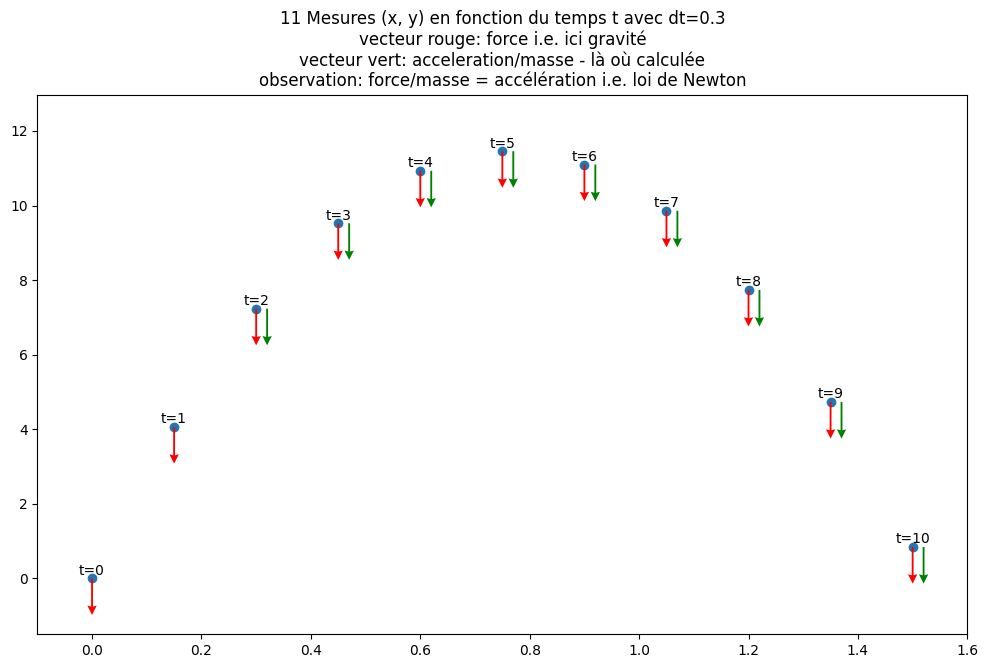

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
title = f"{len(arr)} Mesures (x, y) en fonction du temps t avec dt={dt}"
title += "\nvecteur rouge: force i.e. ici gravité"
title += "\nvecteur vert: acceleration/masse - là où calculée"
title += "\nobservation: force/masse = accélération i.e. loi de Newton"

ax.set_title(title)

x_extra = 0.1
y_extra = 1.5
ax.set_xlim([x_min - x_extra, x_max + x_extra])
ax.set_ylim([y_min - y_extra, y_max + y_extra])

ax.scatter(x, y)

fy = -m * g
echel = 30
shift_a = 0.02

show_force = True
show_accel = True


for e in arr2:
    k = e["k"]
    ax.annotate(f"t={k}", xy=(x[k], y[k]), xytext=(x[k], y[k] + 0.10), ha="center")
    if show_force:
        ax.quiver(
            x[k],
            y[k],
            0,
            fy / echel,
            color="r",
            width=0.002,
            headwidth=5,
            scale_units="xy",
            scale=1,
        )
    if show_accel:
        ax.quiver(
            x[k] + shift_a,
            y[k],
            0,
            m * e["ay"] / echel,
            color="g",
            width=0.002,
            headwidth=5,
            scale_units="xy",
            scale=1,
        )


plt.show()